<a href="https://colab.research.google.com/github/ozturkoktay/ensemble-image-classification/blob/main/pre_trained_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import re
import random
import cv2

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 1s 0us/step


In [ ]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [ ]:
cats_tr = os.listdir(train_cats_dir)
dogs_tr = os.listdir(train_dogs_dir)

cats_val = os.listdir(validation_cats_dir)
dogs_val = os.listdir(validation_dogs_dir)

cats_tr = [os.path.join(train_cats_dir, x) for x in cats_tr]
dogs_tr = [os.path.join(train_dogs_dir, x) for x in dogs_tr]
cats_val = [os.path.join(validation_cats_dir, x) for x in cats_val]
dogs_val = [os.path.join(validation_dogs_dir, x) for x in dogs_val]

total_train = cats_tr + dogs_tr
total_val = cats_val + dogs_val

In [ ]:
random.shuffle(total_train)
X_train = np.zeros((len(total_train), 224, 224, 3)).astype('float')
y_train = []
for i, img_path in enumerate(total_train):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    X_train[i] = img
    if len(re.findall('dog', img_path)) == 3:
        y_train.append(0)
    else: 
        y_train.append(1)
y_train = np.array(y_train)

In [ ]:
random.shuffle(total_val)
X_test = np.zeros((len(total_val), 224, 224, 3)).astype('float')
y_test = []
for i, img_path in enumerate(total_val):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    X_test[i] = img
    if len(re.findall('dog', img_path)) == 3:
        y_test.append(0)
    else: 
        y_test.append(1)
y_test = np.array(y_test)

In [ ]:
batch_size = 32
epochs = 20
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [ ]:
def create_model(base_model):
    base_model.trainable = True
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    prediction_layer = tf.keras.layers.Dense(1, activation='sigmoid')(global_average_layer)
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])
    return model

def fit_model(model):
    history = model.fit(
                        X_train, y_train,
                        batch_size=batch_size,
                        steps_per_epoch=len(total_train) // batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test),
                        validation_steps=len(total_val) // batch_size
                        )
    return history

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [ ]:
IMG_SHAPE = (224, 224, 3)
base_model1 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model2 = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model3 = tf.keras.applications.Xception(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")

model1 = create_model(base_model1)
model2 = create_model(base_model2)
model3 = create_model(base_model3)

history1 = fit_model(model1)
model1.save('models/model1.h5')

history2 = fit_model(model2)
model2.save('models/model2.h5')

history3 = fit_model(model3)
model3.save('models/model3.h5')

83689472/83683744 [==============================] - 1s 0us/step
Epoch 1/20
62/62 [==============================] - 23s 377ms/step - loss: 0.5541 - accuracy: 0.9244 - val_loss: 0.7184 - val_accuracy: 0.6411
Epoch 2/20
62/62 [==============================] - 23s 363ms/step - loss: 0.5097 - accuracy: 0.9893 - val_loss: 0.6511 - val_accuracy: 0.7490
Epoch 3/20
62/62 [==============================] - 22s 363ms/step - loss: 0.5055 - accuracy: 0.9970 - val_loss: 0.5901 - val_accuracy: 0.8558
Epoch 4/20
62/62 [==============================] - 23s 364ms/step - loss: 0.5071 - accuracy: 0.9944 - val_loss: 0.5390 - val_accuracy: 0.9355
Epoch 5/20
62/62 [==============================] - 23s 365ms/step - loss: 0.5025 - accuracy: 0.9970 - val_loss: 0.5362 - val_accuracy: 0.9405
Epoch 6/20
62/62 [==============================] - 22s 362ms/step - loss: 0.5085 - accuracy: 0.9980 - val_loss: 0.5412 - val_accuracy: 0.9385
Epoch 7/20
62/62 [==============================] - 23s 365ms/step - loss: 0.

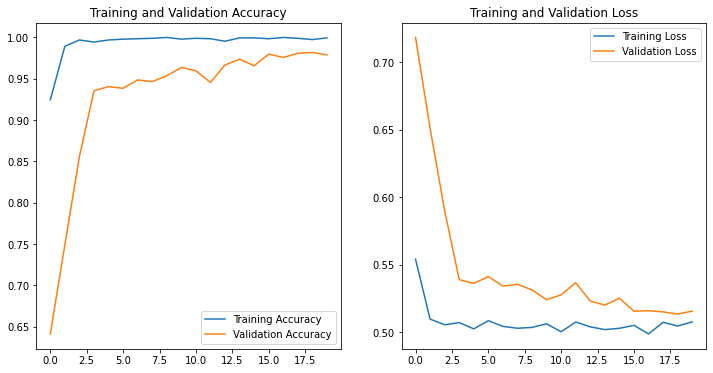

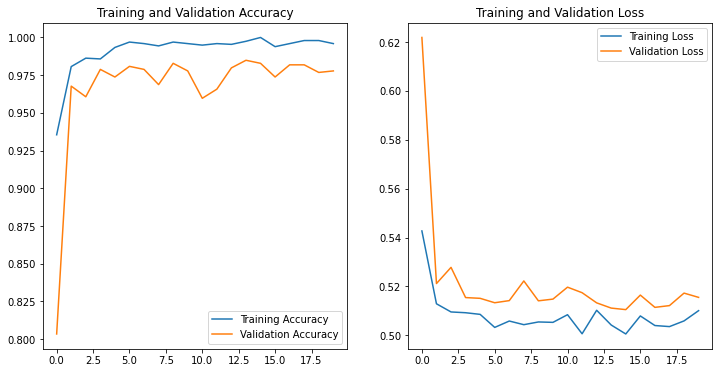

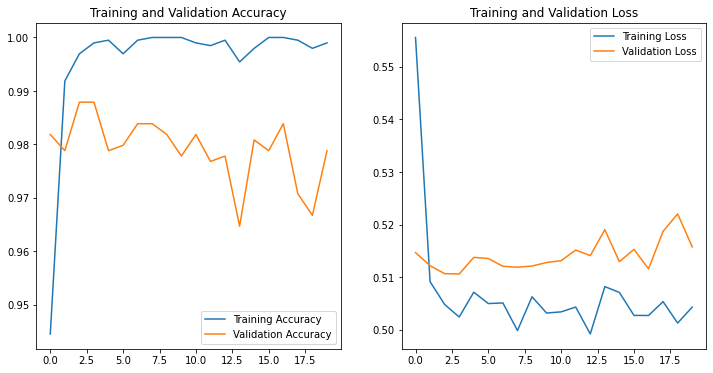

In [ ]:
plot_history(history1)
plot_history(history2)
plot_history(history3)

In [ ]:
def load_all_models():
    all_models = []
    model_names = ['model1.h5', 'model2.h5', 'model3.h5']
    for model_name in model_names:
        filename = os.path.join('models', model_name)
        model = tf.keras.models.load_model(filename)
        all_models.append(model)
        print('loaded:', filename)
    return all_models

In [ ]:
def ensemble_model(models):
    for i, model in enumerate(models):
        for layer in model.layers:
            layer.trainable = False
    ensemble_visible = [model.input for model in models]
    ensemble_outputs = [model.output for model in models]
    merge = tf.keras.layers.concatenate(ensemble_outputs)
    merge = tf.keras.layers.Dense(10, activation='relu')(merge)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(merge)
    model = tf.keras.models.Model(inputs=ensemble_visible, outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])
    return model

In [ ]:
models = load_all_models()
model = ensemble_model(models)

loaded: models/model1.h5
loaded: models/model2.h5
loaded: models/model3.h5


In [ ]:
X = [X_train for _ in range(len(model.input))]
X_1 = [X_test for _ in range(len(model.input))]

In [ ]:
epochs = 20
history = model.fit(X, y_train,
                    batch_size=batch_size,
                    steps_per_epoch=len(total_train) // batch_size,
                    epochs=epochs,
                    validation_data=(X_1, y_test),
                    validation_steps=len(total_val) // batch_size
                    )

Epoch 1/20
62/62 [==============================] - 54s 866ms/step - loss: 0.7267 - accuracy: 0.6159 - val_loss: 0.7137 - val_accuracy: 0.9667
Epoch 2/20
62/62 [==============================] - 51s 818ms/step - loss: 0.6981 - accuracy: 0.9995 - val_loss: 0.6893 - val_accuracy: 0.9728
Epoch 3/20
62/62 [==============================] - 50s 814ms/step - loss: 0.6753 - accuracy: 0.9995 - val_loss: 0.6690 - val_accuracy: 0.9728
Epoch 4/20
62/62 [==============================] - 50s 814ms/step - loss: 0.6587 - accuracy: 0.9995 - val_loss: 0.6526 - val_accuracy: 0.9728
Epoch 5/20
62/62 [==============================] - 50s 814ms/step - loss: 0.6381 - accuracy: 0.9995 - val_loss: 0.6388 - val_accuracy: 0.9708
Epoch 6/20
62/62 [==============================] - 50s 814ms/step - loss: 0.6218 - accuracy: 0.9995 - val_loss: 0.6263 - val_accuracy: 0.9738
Epoch 7/20
62/62 [==============================] - 50s 814ms/step - loss: 0.6121 - accuracy: 1.0000 - val_loss: 0.6140 - val_accuracy: 0.9738

In [ ]:
model.save('models/model.h5')

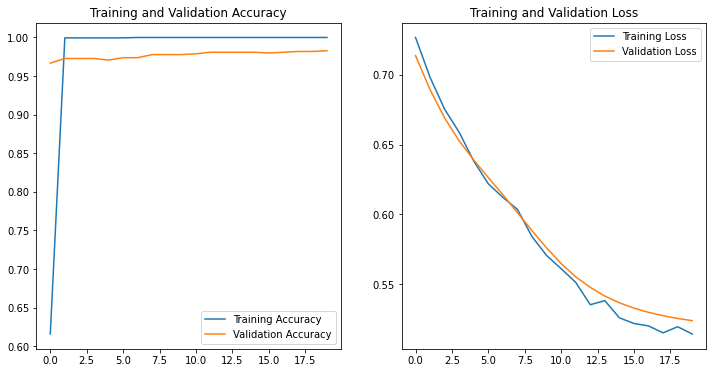

In [ ]:
plot_history(history)

In [ ]:
print('MobileNetV2 acc:', history1.history['val_accuracy'][-1])
print('InceptionV3 acc:', history2.history['val_accuracy'][-1])
print('Xception acc:', history3.history['val_accuracy'][-1])
print('Ensemble acc:', history.history['val_accuracy'][-1])

MobileNetV2 acc: 0.9788306355476379
InceptionV3 acc: 0.9778226017951965
Xception acc: 0.9788306355476379
Ensemble acc: 0.9828628897666931
